## Life Expectancy By US Counties

In [1]:
import csv
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

##### create dataframe and clean FIPS codes

In [2]:
life_exp_us = pd.read_excel('data/IHME/ihme.xlsx', header=1)
life_exp_us['FIPS'] = life_exp_us['FIPS'].astype(dtype=pd.Int64Dtype())
life_exp_us['FIPS'] = life_exp_us['FIPS'].apply(lambda x: str(x).rjust(5, '0') if(len(str(x)) == 4) else x)
life_exp_us['FIPS'] = life_exp_us['FIPS'].apply(lambda x: str(x).ljust(5, '0') if(np.all(pd.notnull(x))) else x)

##### extract data for counties only

In [3]:
life_exp_counties = life_exp_us[life_exp_us['Location'].str.contains('County')]
life_exp_counties.head()

,Location,FIPS,"Life expectancy, 1980*","Life expectancy, 1985*","Life expectancy, 1990*","Life expectancy, 1995*","Life expectancy, 2000*","Life expectancy, 2005*","Life expectancy, 2010*","Life expectancy, 2014*","% Change in Life Expectancy, 1980-2014"
2,"Autauga County, Alabama",01001,"71.99 (71.33, 72.63)","72.70 (72.10, 73.32)","73.10 (72.54, 73.66)","73.69 (73.22, 74.20)","74.55 (74.10, 75.04)","74.71 (74.23, 75.20)","75.74 (75.25, 76.25)","75.67 (75.15, 76.18)","5.10 (3.86, 6.43)"
3,"Baldwin County, Alabama",01003,"74.07 (73.60, 74.58)","74.92 (74.48, 75.37)","75.31 (74.88, 75.71)","75.79 (75.40, 76.20)","76.80 (76.45, 77.17)","77.09 (76.72, 77.47)","77.80 (77.45, 78.14)","78.08 (77.72, 78.43)","5.41 (4.51, 6.26)"
4,"Barbour County, Alabama",01005,"71.52 (70.79, 72.20)","72.48 (71.92, 73.10)","72.80 (72.23, 73.40)","73.24 (72.69, 73.81)","74.13 (73.59, 74.64)","74.30 (73.69, 74.87)","75.34 (74.72, 75.95)","75.42 (74.78, 76.07)","5.46 (4.10, 6.90)"
5,"Bibb County, Alabama",01007,"71.61 (70.86, 72.36)","72.17 (71.48, 72.83)","72.61 (72.01, 73.22)","72.62 (72.02, 73.16)","73.56 (72.98, 74.14)","73.38 (72.78, 73.97)","74.13 (73.48, 74.77)","73.97 (73.28, 74.68)","3.29 (1.83, 4.92)"
6,"Blount County, Alabama",01009,"74.01 (73.40, 74.64)","74.50 (73.97, 75.05)","74.70 (74.19, 75.21)","74.80 (74.29, 75.29)","75.62 (75.16, 76.05)","75.71 (75.25, 76.19)","76.41 (75.96, 76.91)","76.16 (75.66, 76.69)","2.91 (1.76, 4.10)"


##### clean up life expectancy data without confidence intervals

In [4]:
#counties_clean = life_exp_counties.filter(['Location'], axis=1)
counties_clean = pd.DataFrame()
column_list = life_exp_counties.filter(like='*').columns

for col in column_list:
    counties_clean[col] = life_exp_counties[col].map(lambda x: float(x.partition(' ')[0]))

counties_clean.columns += '_clean'
counties_clean.head(3)

,"Life expectancy, 1980*_clean","Life expectancy, 1985*_clean","Life expectancy, 1990*_clean","Life expectancy, 1995*_clean","Life expectancy, 2000*_clean","Life expectancy, 2005*_clean","Life expectancy, 2010*_clean","Life expectancy, 2014*_clean"
2,71.99,72.70,73.10,73.69,74.55,74.71,75.74,75.67
3,74.07,74.92,75.31,75.79,76.80,77.09,77.80,78.08
4,71.52,72.48,72.80,73.24,74.13,74.30,75.34,75.42


##### create df with state names and abbreviations 

In [5]:
states = geopandas.read_file('data/TIGER/cb_2015_us_state_500k')
state_list = list(states['NAME'])

In [6]:
#state_name_abb = life_exp_counties.filter(['Location'], axis=1)
state_name_abb = pd.DataFrame()

pat = '|'.join(r"\b{}\b".format(x) for x in state_list)
state_name_abb['State'] = life_exp_counties['Location'].str.extract('('+ pat + ')', expand=False)

In [7]:
state_name = states.set_index('NAME')
state_name_abb['Abb'] = state_name_abb['State'].apply(lambda x: state_name.loc[x])['STUSPS']

##### combine state_name_abb and counties_clean

In [8]:
life_exp_counties = pd.concat([life_exp_counties, counties_clean, state_name_abb], axis=1).drop_duplicates()
life_exp_counties.head(3)

,Location,FIPS,"Life expectancy, 1980*","Life expectancy, 1985*","Life expectancy, 1990*","Life expectancy, 1995*","Life expectancy, 2000*","Life expectancy, 2005*","Life expectancy, 2010*","Life expectancy, 2014*",...,"Life expectancy, 1980*_clean","Life expectancy, 1985*_clean","Life expectancy, 1990*_clean","Life expectancy, 1995*_clean","Life expectancy, 2000*_clean","Life expectancy, 2005*_clean","Life expectancy, 2010*_clean","Life expectancy, 2014*_clean",State,Abb
2,"Autauga County, Alabama",01001,"71.99 (71.33, 72.63)","72.70 (72.10, 73.32)","73.10 (72.54, 73.66)","73.69 (73.22, 74.20)","74.55 (74.10, 75.04)","74.71 (74.23, 75.20)","75.74 (75.25, 76.25)","75.67 (75.15, 76.18)",...,71.99,72.70,73.10,73.69,74.55,74.71,75.74,75.67,Alabama,AL
3,"Baldwin County, Alabama",01003,"74.07 (73.60, 74.58)","74.92 (74.48, 75.37)","75.31 (74.88, 75.71)","75.79 (75.40, 76.20)","76.80 (76.45, 77.17)","77.09 (76.72, 77.47)","77.80 (77.45, 78.14)","78.08 (77.72, 78.43)",...,74.07,74.92,75.31,75.79,76.80,77.09,77.80,78.08,Alabama,AL
4,"Barbour County, Alabama",01005,"71.52 (70.79, 72.20)","72.48 (71.92, 73.10)","72.80 (72.23, 73.40)","73.24 (72.69, 73.81)","74.13 (73.59, 74.64)","74.30 (73.69, 74.87)","75.34 (74.72, 75.95)","75.42 (74.78, 76.07)",...,71.52,72.48,72.80,73.24,74.13,74.30,75.34,75.42,Alabama,AL


##### create maps

In [9]:
counties = geopandas.read_file('data/TIGER/cb_2015_us_county_500k')
counties.crs = {'proj': 'aea', 'lat_1': '29.5', 'lat_2': '45.5', 'lat_0': '37.5', 'lon_0': '-96', 'x_0': '0', 'y_0': '0',
              'ellps': 'GRS80', 'datum': 'NAD83', 'units': 'm', 'no_defs': True}


states.crs = {'proj': 'aea', 'lat_1': '29.5', 'lat_2': '45.5', 'lat_0': '37.5', 'lon_0': '-96', 'x_0': '0', 'y_0': '0',
              'ellps': 'GRS80', 'datum': 'NAD83', 'units': 'm', 'no_defs': True}

In [10]:
counties = pd.merge(life_exp_counties, counties, how='left', left_on='FIPS', right_on='GEOID')

In [11]:
states = pd.merge(life_exp_counties, states, how='left', left_on='Abb', right_on='STUSPS')

##### plot

In [12]:
counties_map = geopandas.read_file('counties/counties.shp')
states_map = geopandas.read_file('states/states.shp')

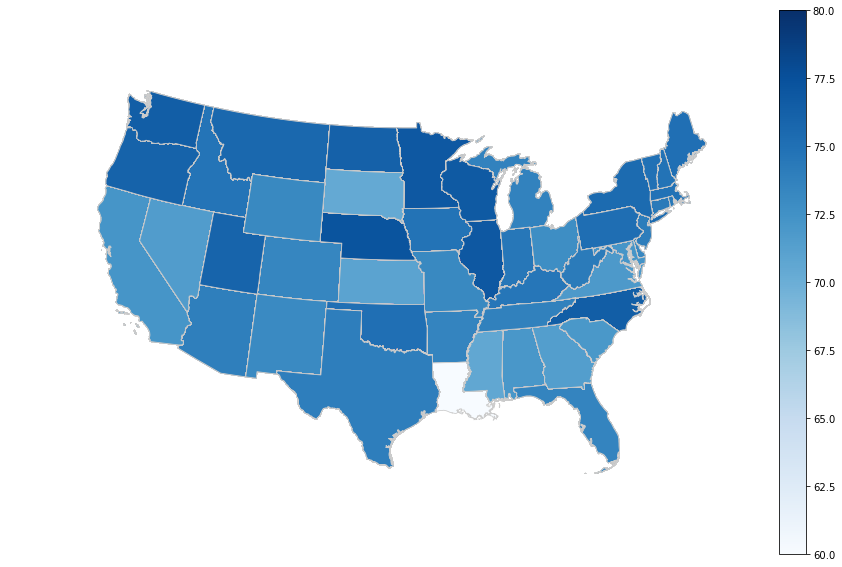

In [49]:
states_data = states[['Life expectancy, 1980*_clean', 'Life expectancy, 1985*_clean',
       'Life expectancy, 1990*_clean', 'Life expectancy, 1995*_clean',
       'Life expectancy, 2000*_clean', 'Life expectancy, 2005*_clean',
       'Life expectancy, 2010*_clean', 'Life expectancy, 2014*_clean', 'State',
       'Abb']]

merged = states_map.set_index('STUSPS').join(states_data.set_index('Abb'))
#merged.head()
vmin, vmax = 60, 80
fig, ax = plt.subplots(1, figsize=(15, 10))

merged.plot(column='Life expectancy, 1980*_clean', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [62]:
counties_data = states[['Life expectancy, 1980*_clean', 'Life expectancy, 1985*_clean',
       'Life expectancy, 1990*_clean', 'Life expectancy, 1995*_clean',
       'Life expectancy, 2000*_clean', 'Life expectancy, 2005*_clean',
       'Life expectancy, 2010*_clean', 'Life expectancy, 2014*_clean',
       'FIPS']]

merged2 = counties_map.set_index('GEOID').join(counties_data.set_index('FIPS'))
#merged.head()

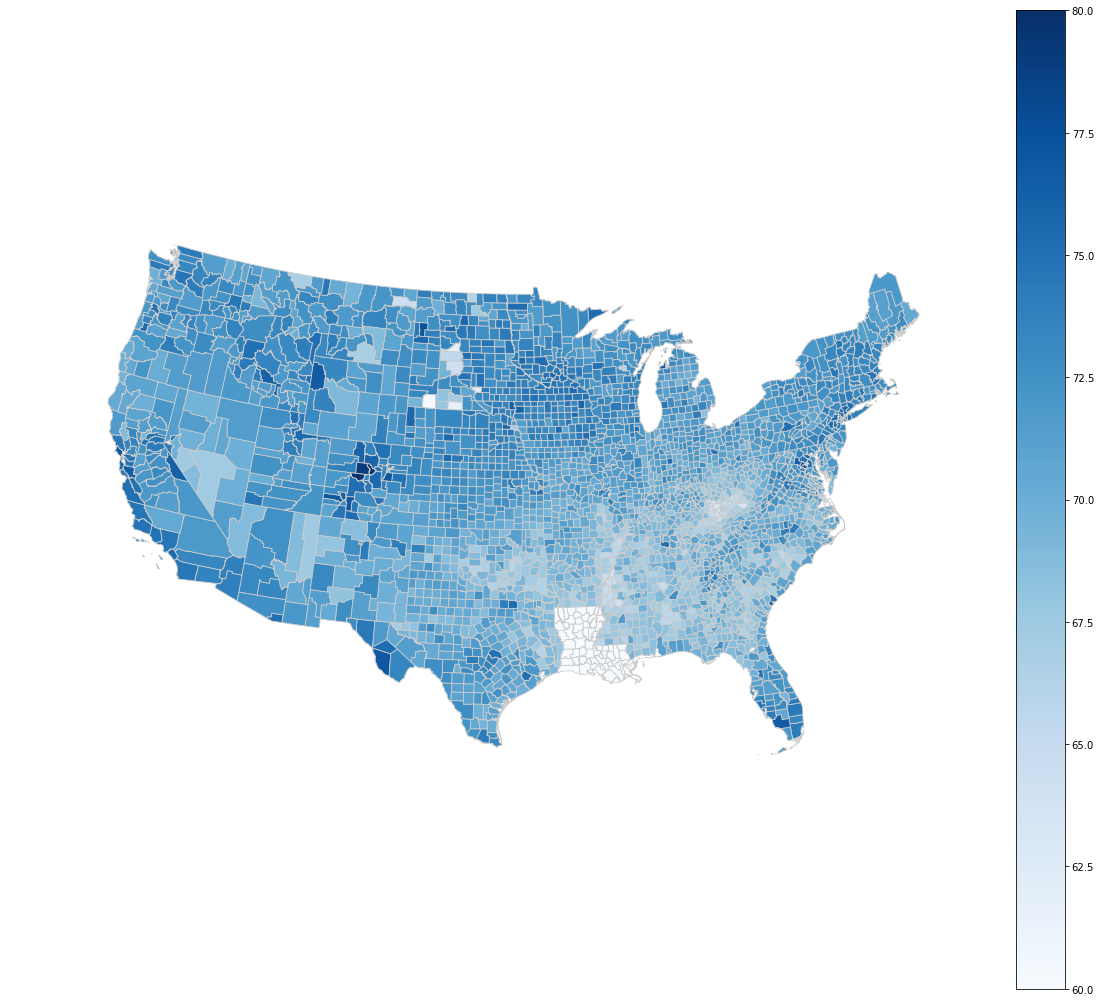

In [64]:
vmin, vmax = 60, 80

fig, ax = plt.subplots(1, figsize=(20, 18))

merged2.plot(column='Life expectancy, 2014*_clean', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)